# AMOD 5430 Project: Analyzing Gender-Based Purchase Behavior on Black Friday: A Study of Walmart Inc. Customers 

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kstest
import statistics
from scipy.stats import norm

### Data Preprocessing

In [44]:
data = pd.read_csv('dataset.csv')
data = data.sample(n=100000)
data.to_csv('sample_data.csv')

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
220634,1004009,P00345542,M,18-25,7,C,4+,0,5,5275
76125,1005744,P00285842,F,26-35,4,A,2,0,5,6980
202845,1001298,P0094842,M,36-45,6,B,4+,0,4,2810
201423,1001117,P00058442,M,18-25,14,B,3,0,5,7030
417513,1004236,P00002442,F,26-35,3,C,4+,1,8,5868


In [4]:
# Checking Null Values
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no null values in our data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 220634 to 513703
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     100000 non-null  int64 
 1   Product_ID                  100000 non-null  object
 2   Gender                      100000 non-null  object
 3   Age                         100000 non-null  object
 4   Occupation                  100000 non-null  int64 
 5   City_Category               100000 non-null  object
 6   Stay_In_Current_City_Years  100000 non-null  object
 7   Marital_Status              100000 non-null  int64 
 8   Product_Category            100000 non-null  int64 
 9   Purchase                    100000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 8.4+ MB


In [6]:
data.describe(include= object).T

,count,unique,top,freq
Product_ID,100000,3315,P00265242,338
Gender,100000,2,M,75342
Age,100000,7,26-35,39866
City_Category,100000,3,B,42022
Stay_In_Current_City_Years,100000,5,1,35269


Let's check for outliers

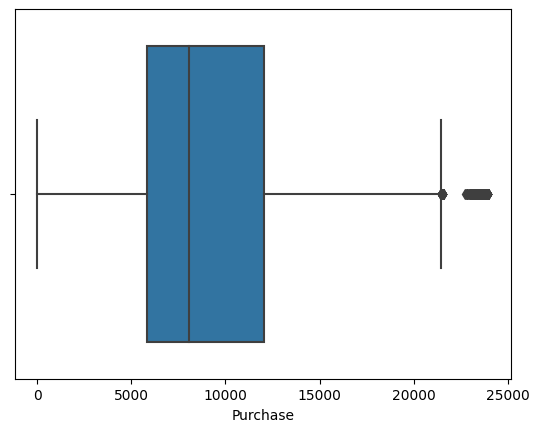

<Figure size 2000x1500 with 0 Axes>

In [7]:
# Checking the income outliers 
fig, ax = plt.subplots()
fig = plt.figure(figsize=(20,15))
plt.suptitle("Purchase amount Outliers")
fig = sns.boxplot(data = data,x="Purchase",ax=ax)
plt.show()

In [8]:
# Quartile Information as displayed in above Boxplot 

Q1 = data["Purchase"].quantile(0.25)
Q2 = data["Purchase"].median()
Q3 = data["Purchase"].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - (1.5 * IQR)
upper_whisker = Q3 + (1.5 * IQR)
print("Lower Whisker(Income): {} \n Quartile-1 : {}\n Quartile-2 : {}\n Quartile-3 : {}\n IQR : {}\n Upper Whisker(Income) : {}".format(lower_whisker,Q1,Q2,Q3,IQR,upper_whisker))

Lower Whisker(Income): -3528.0 
 Quartile-1 : 5832.0
 Quartile-2 : 8048.5
 Quartile-3 : 12072.0
 IQR : 6240.0
 Upper Whisker(Income) : 21432.0


In [9]:
# Finding the number of Outliers
data.loc[data["Purchase"] > 21400.5][["User_ID"]].count()

User_ID    503
dtype: int64

As per IQR method, we found that there are 2677 oultliers in our data

In [10]:
# Analyzing mean, std, and median before and after the removal of outliers

# Before

before_mean = data["Purchase"].mean()
before_stddev = data["Purchase"].std()
before_median = data["Purchase"].median()

print("Before removing outliers \n \nMean: {} \nStandard Deviation : {}\nMedian : {}\n".format(before_mean,before_stddev,before_median))

# If outliers are removed

after_mean = data.loc[data["Purchase"] < 21400.5]["Purchase"].mean()
after_stddev = data.loc[data["Purchase"] < 21400.5]["Purchase"].std()
after_median = data.loc[data["Purchase"] < 21400.5]["Purchase"].median()

print("After removing outliers \n \nMean: {} \nStandard Deviation : {}\nMedian : {}".format(after_mean,after_stddev,after_median))

Before removing outliers 
 
Mean: 9285.69389 
Standard Deviation : 5037.373368283434
Median : 8048.5

After removing outliers 
 
Mean: 9215.365548710011 
Standard Deviation : 4951.5018828139055
Median : 8040.0


There is not a significant change in mean, std, and median after removing the outliers, hence we can continue our analysis with the outliers

Now, let's perform descriptive analysis

In [11]:
# Customer Gender Ratio

count_matrix = data.groupby(["Gender"])["User_ID"].nunique().sort_values(ascending=False).reset_index()
count_matrix.columns=["Gender","count"]
count_matrix.style.background_gradient(cmap = "Blues")

,Gender,count
0,M,4184
1,F,1644


In [12]:
# Customer count as per Gender and Age group

count_matrix = data.groupby(["Gender","Age"])["User_ID"].nunique().sort_values(ascending=False).reset_index()
count_matrix.columns=["Gender","Age Group","count"]
count_matrix.sort_values(by=['Gender','Age Group']).style.background_gradient(cmap = "Blues")

,Gender,Age Group,count
13,F,0-17,77
7,F,18-25,285
3,F,26-35,540
6,F,36-45,326
9,F,46-50,180
10,F,51-55,139
12,F,55+,97
11,M,0-17,138
2,M,18-25,770
0,M,26-35,1499


In [13]:
# Top 5 popular products

count_matrix = data.groupby(["Product_ID"])["User_ID"].nunique().sort_values(ascending=False).reset_index()
count_matrix.columns=["Product_ID","count"]
count_matrix.head().style.background_gradient(cmap = "Blues")

,Product_ID,count
0,P00265242,338
1,P00110742,302
2,P00025442,301
3,P00184942,275
4,P00057642,271


In [14]:
# Top 5 popular products with Males

count_matrix = data.loc[data["Gender"]=="M"].groupby(["Gender","Product_ID"])["User_ID"].nunique().sort_values(ascending=False).reset_index()
count_matrix.columns=["Gender","Product_ID","count"]
count_matrix.head().style.background_gradient(cmap = "Blues")

,Gender,Product_ID,count
0,M,P00265242,247
1,M,P00025442,242
2,M,P00057642,233
3,M,P00110742,228
4,M,P00237542,215


In [15]:
# Top 5 popular products with Females

count_matrix = data.loc[data["Gender"]=="F"].groupby(["Gender","Product_ID"])["User_ID"].nunique().sort_values(ascending=False).reset_index()
count_matrix.columns=["Gender","Product_ID","count"]
count_matrix.head().style.background_gradient(cmap = "Blues")

,Gender,Product_ID,count
0,F,P00265242,91
1,F,P00220442,85
2,F,P00255842,84
3,F,P00051442,81
4,F,P00110742,74


In [16]:
# Most popular products in all age group and in both gender

count_matrix = data.groupby(["Gender","Age","Product_ID"])["User_ID"].count().sort_values(ascending=False).reset_index()
count_matrix.columns=["Gender","Age Group","Product_ID","count"]
count_matrix["rank"]= count_matrix.groupby(["Gender","Age Group"])["count"].rank(method="max",ascending=False)
count_matrix.loc[count_matrix["rank"] == 1.0][["Gender","Age Group","Product_ID","count"]].sort_values(by=["Gender","Age Group"]).style.background_gradient(cmap = "Blues")

,Gender,Age Group,Product_ID,count
489,F,18-25,P00265242,25
241,F,26-35,P00265242,33
3408,F,55+,P00220442,7
1714,M,0-17,P00355142,12
54,M,18-25,P00265242,54
0,M,26-35,P00110742,102
81,M,36-45,P00025442,48
606,M,46-50,P00110542,23
474,M,51-55,P00265242,25
1457,M,55+,P00046742,14


In [17]:
# Top 5 popular product category with Females

count_matrix = data.loc[data["Gender"]=="F"].groupby(["Gender","Product_Category"])["User_ID"].nunique().sort_values(ascending=False).reset_index()
count_matrix.columns=["Gender","Product_Category","count"]
count_matrix.head().style.background_gradient(cmap = "Blues", subset=['count'])

,Gender,Product_Category,count
0,F,5,1316
1,F,8,1235
2,F,1,1125
3,F,2,535
4,F,3,533


In [18]:
# Top 5 popular product category with Males

count_matrix = data.loc[data["Gender"]=="M"].groupby(["Gender","Product_Category"])["User_ID"].nunique().sort_values(ascending=False).reset_index()
count_matrix.columns=["Gender","Product_Category","count"]
count_matrix.head().style.background_gradient(cmap = "Blues", subset=['count'])

,Gender,Product_Category,count
0,M,1,3432
1,M,5,3311
2,M,8,3072
3,M,2,1632
4,M,6,1534


### Univariate Analysis

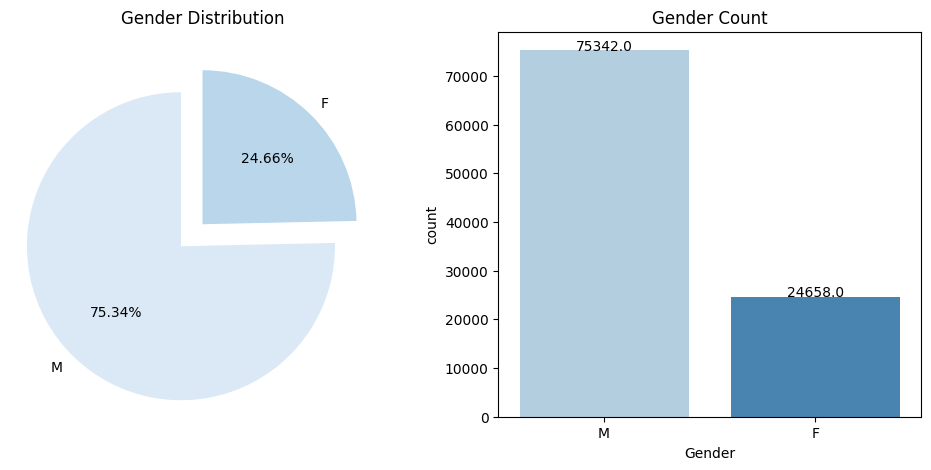

In [19]:
# Proportion of Male and Female customers

plt.figure(figsize=(12, 5))

# Pie chart with red color palette
plt.subplot(1, 2, 1)
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, explode=(0.2, 0), autopct='%2.2f%%', startangle=90, colors=sns.color_palette('Blues'))
plt.title('Gender Distribution')

# Count plot with red color palette
plt.subplot(1, 2, 2)
ax = sns.countplot(data=data, x='Gender', palette='Blues')  # Adjusted color palette
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Gender Count')
plt.show()

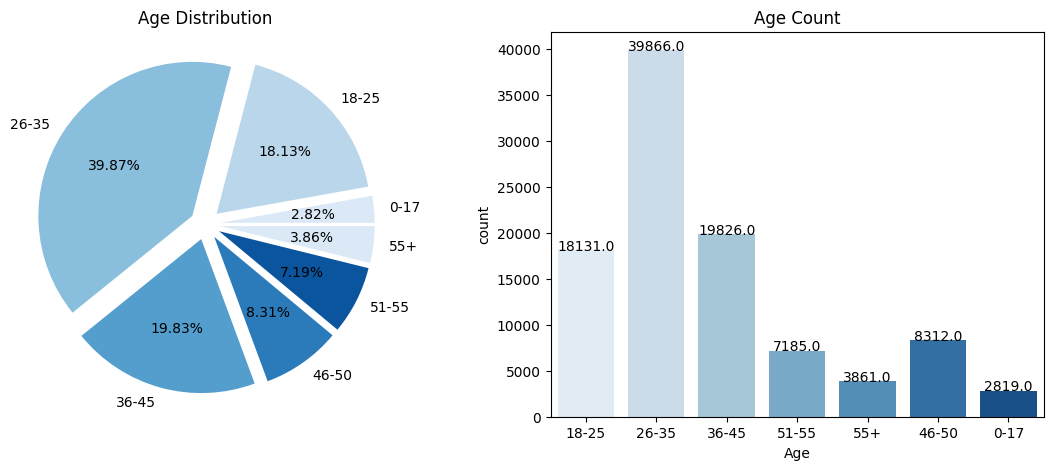

In [20]:
# Age distribution of customers

plt.figure(figsize=(14, 5))

# Pie chart with red color palette
plt.subplot(1, 2, 1)
labels = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
plt.pie(data.groupby(["Age"])['Age'].count(), labels=labels, explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%2.2f%%', colors=sns.color_palette('Blues'))
plt.title('Age Distribution')

# Count plot with red color palette
plt.subplot(1, 2, 2)
ax = sns.countplot(data=data, x='Age', palette='Blues') 
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Age Count')
plt.show()

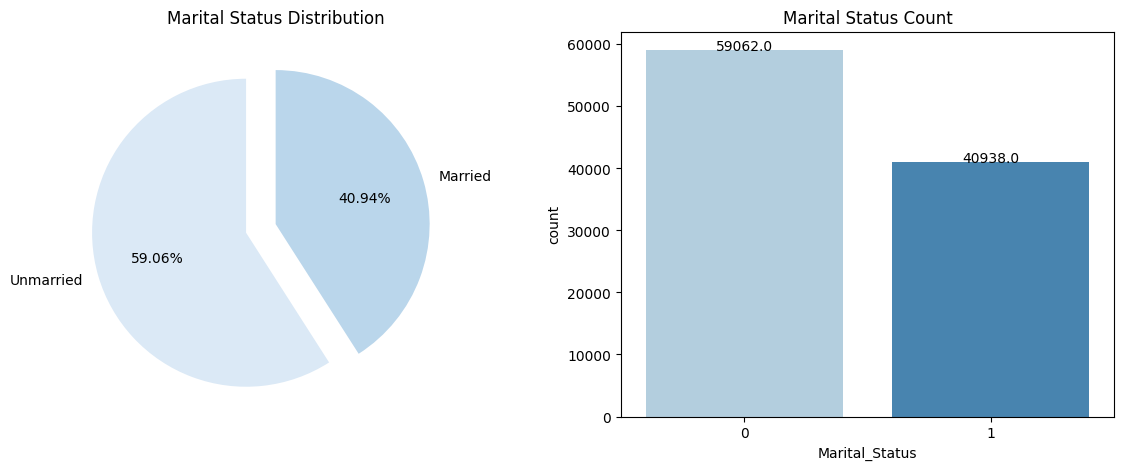

In [21]:
# Marital Status Distribution

plt.figure(figsize=(14, 5))

# Pie chart with red color palette
plt.subplot(1, 2, 1)
labels = ['Unmarried', 'Married']
plt.pie(data.groupby(["Marital_Status"])['Marital_Status'].count(), labels=labels, explode=(0.2, 0), autopct='%2.2f%%', colors=sns.color_palette('Blues'),startangle=90)
plt.title('Marital Status Distribution')

# Count plot with red color palette
plt.subplot(1, 2, 2)
ax = sns.countplot(data=data, x='Marital_Status', palette='Blues')  # Adjusted color palette
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Marital Status Count')
plt.show()


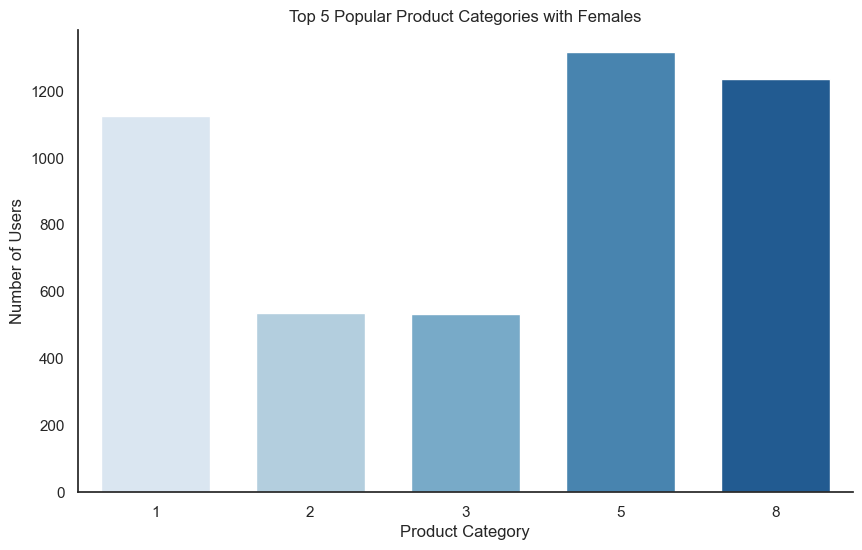

In [22]:
# Bar Plot Showing most popular product category with female

count_matrix = data.loc[data["Gender"] == "F"].groupby(["Gender", "Product_Category"])["User_ID"].nunique().sort_values(ascending=False).reset_index()
count_matrix.columns = ["Gender", "Product_Category", "count"]
top_categories = count_matrix.head()

# Set the background color to white and remove grid lines
sns.set(style="white", rc={"axes.grid": False})

# Decrease the width of the bars
bar_width = 0.7

# Plotting the bar plot with decreased width
plt.figure(figsize=(10, 6))
sns.barplot(x="Product_Category", y="count", data=top_categories, palette="Blues", width=bar_width)
plt.title("Top 5 Popular Product Categories with Females")
plt.xlabel("Product Category")
plt.ylabel("Number of Users")

# Remove top and right spines for aesthetics
sns.despine()

plt.show()

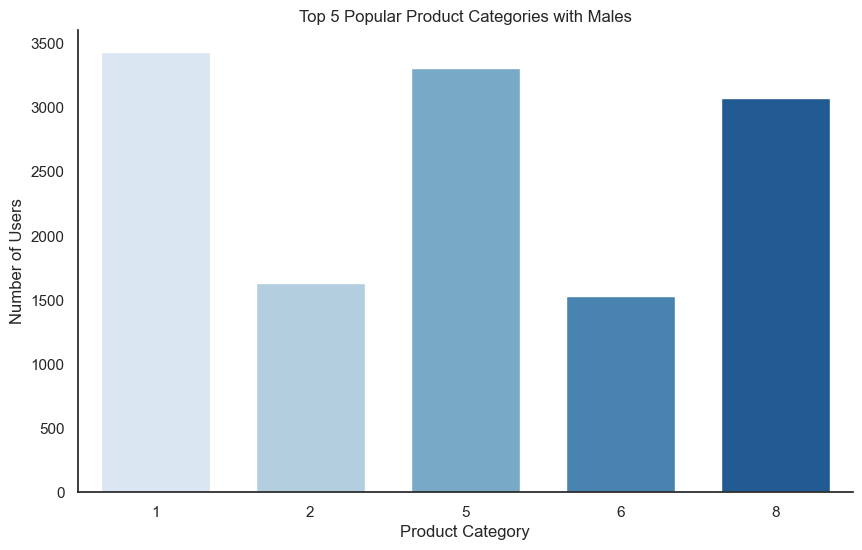

In [23]:
# Bar plot showing most popular product category with Male.

count_matrix = data.loc[data["Gender"] == "M"].groupby(["Gender", "Product_Category"])["User_ID"].nunique().sort_values(ascending=False).reset_index()
count_matrix.columns = ["Gender", "Product_Category", "count"]
top_categories = count_matrix.head()

# Set the background color to white and remove grid lines
sns.set(style="white", rc={"axes.grid": False})

# Decrease the width of the bars
bar_width = 0.7

# Plotting the bar plot with decreased width
plt.figure(figsize=(10, 6))
sns.barplot(x="Product_Category", y="count", data=top_categories, palette="Blues", width=bar_width)
plt.title("Top 5 Popular Product Categories with Males")
plt.xlabel("Product Category")
plt.ylabel("Number of Users")

sns.despine()

plt.show()



### Bivariate Analysis

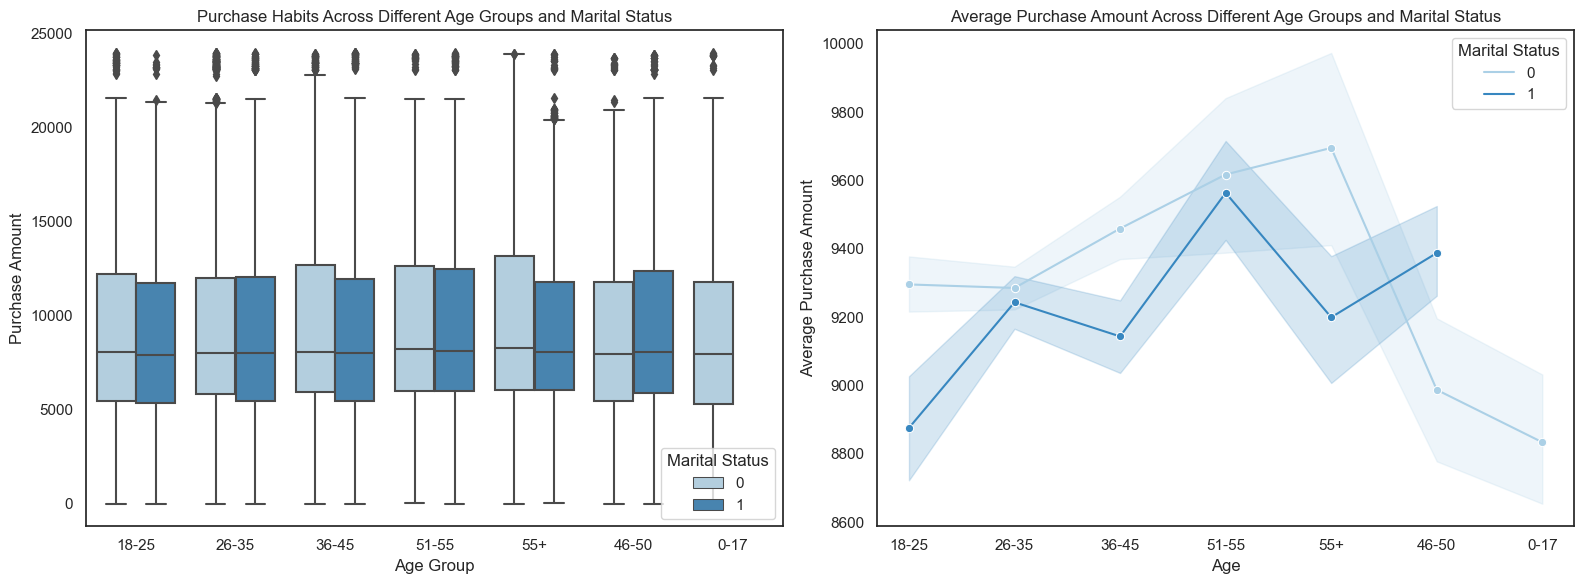

In [24]:
# Purchase habits related to marital status among different age groups


# Set up the figure with two subplots, swapping the positions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Line plot for age groups and marital status
sns.lineplot(x='Age', y='Purchase', hue='Marital_Status', data=data, palette='Blues', marker='o', ax=axes[1])  
axes[1].set_ylabel('Average Purchase Amount')
axes[1].set_title('Average Purchase Amount Across Different Age Groups and Marital Status')
axes[1].legend(title='Marital Status')

# Plot 2: Box plot for age groups and marital status
sns.boxplot(x='Age', y='Purchase', hue='Marital_Status', data=data, palette='Blues', ax=axes[0])
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Purchase Amount')
axes[0].set_title('Purchase Habits Across Different Age Groups and Marital Status')
axes[0].legend(title='Marital Status')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

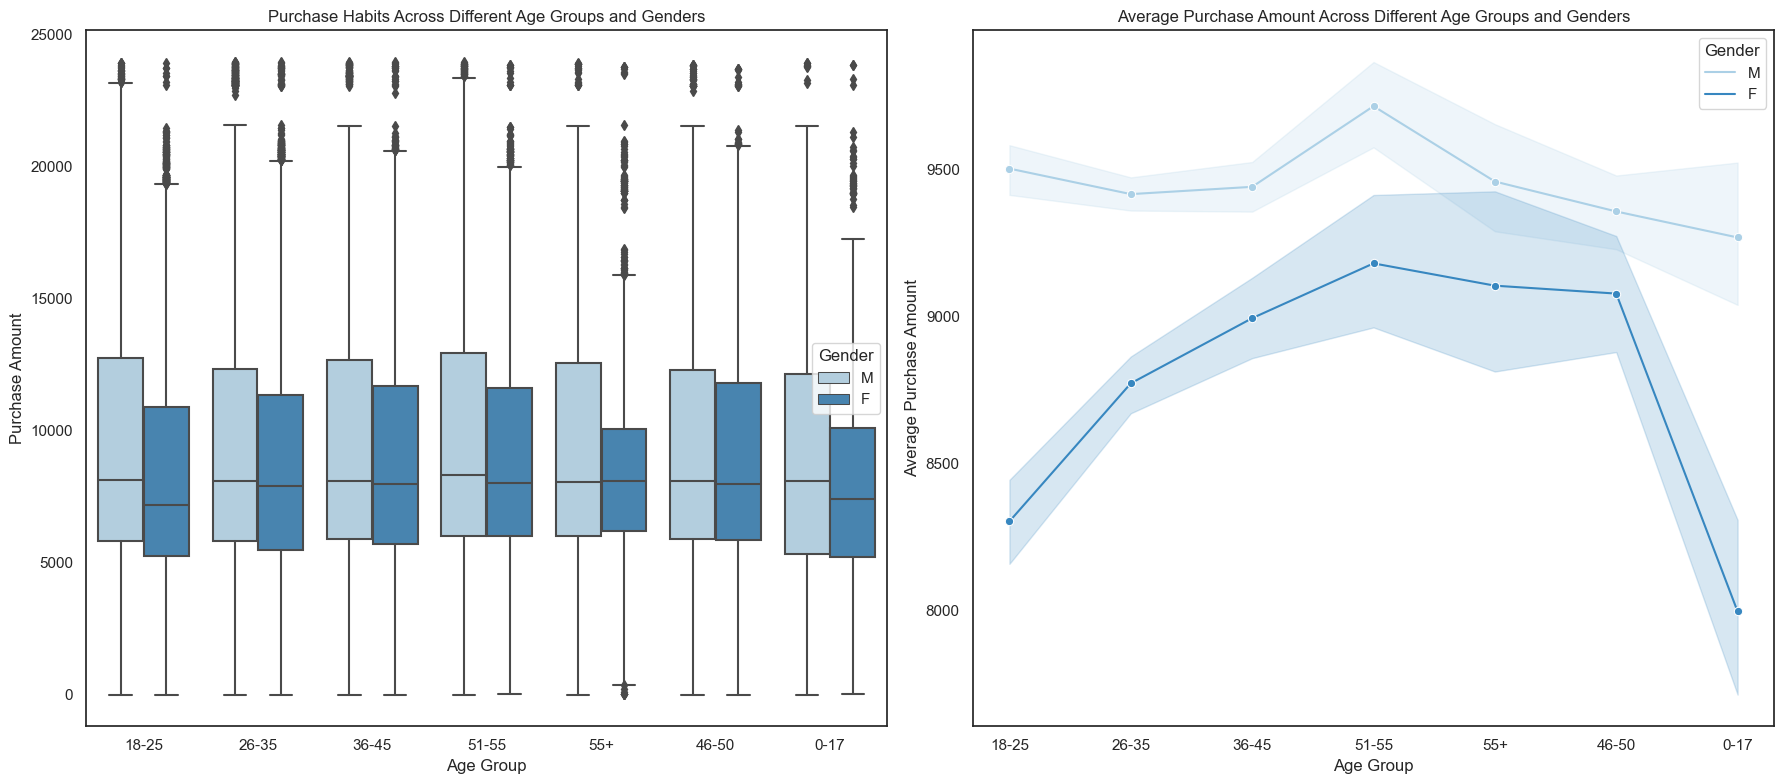

In [25]:
# Purchase habits related to gender among different age groups


# Set up the figure with two subplots, swapping the positions
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Line plot for age groups and gender
sns.lineplot(x='Age', y='Purchase', hue='Gender', data=data, palette='Blues', marker='o', ax=axes[1])  # <-- Notice the change here
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Average Purchase Amount')
axes[1].set_title('Average Purchase Amount Across Different Age Groups and Genders')
axes[1].legend(title='Gender')

# Plot 2: Box plot for age groups and gender
sns.boxplot(x='Age', y='Purchase', hue='Gender', data=data, palette='Blues', ax=axes[0])  # <-- Notice the change here
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Purchase Amount')
axes[0].set_title('Purchase Habits Across Different Age Groups and Genders')
axes[0].legend(title='Gender')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

### CLT Analysis

### Bootstrap Function

Bootstrap function for gender comparison

In [26]:
def bootstrapping(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    
    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = statistics.stdev(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)
    
    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)
    
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = statistics.stdev(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)
    
    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)
        
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp1_means_m,color="#FFEA00",fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,color='#1434A4',fill=True,linewidth=2)
    
    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))
    
    plt.title(f"Sample Size: {smp_siz}, Male Avg: {np.round(mean1, 2)}, Male SME: {np.round(sem1,2)},Female Avg:{np.round(mean2, 2)}, Female SME: {np.round(sem2,2)}",
              fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = '#8B8000', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = '#E49B0F', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = '#E49B0F', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = '#6495ED', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#00008B', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#00008B', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')
    
    plt.show()
    
    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

### CLT Analysis - gender comparison

In [27]:
retail_data_smp_male = data[data['Gender'] == 'M']['Purchase']
retail_data_smp_female = data[data['Gender'] == 'F']['Purchase']

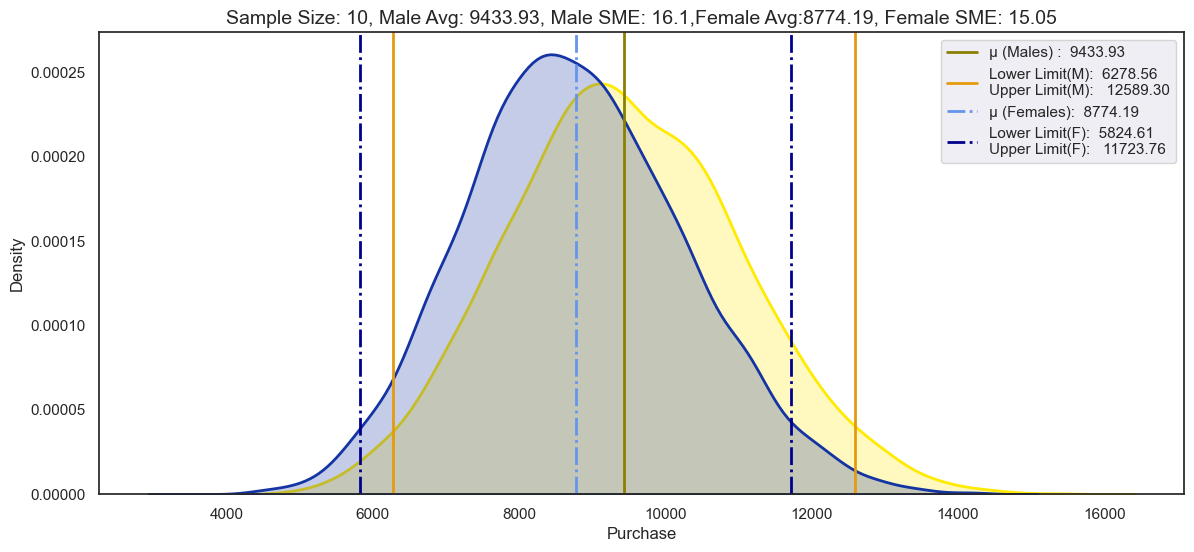

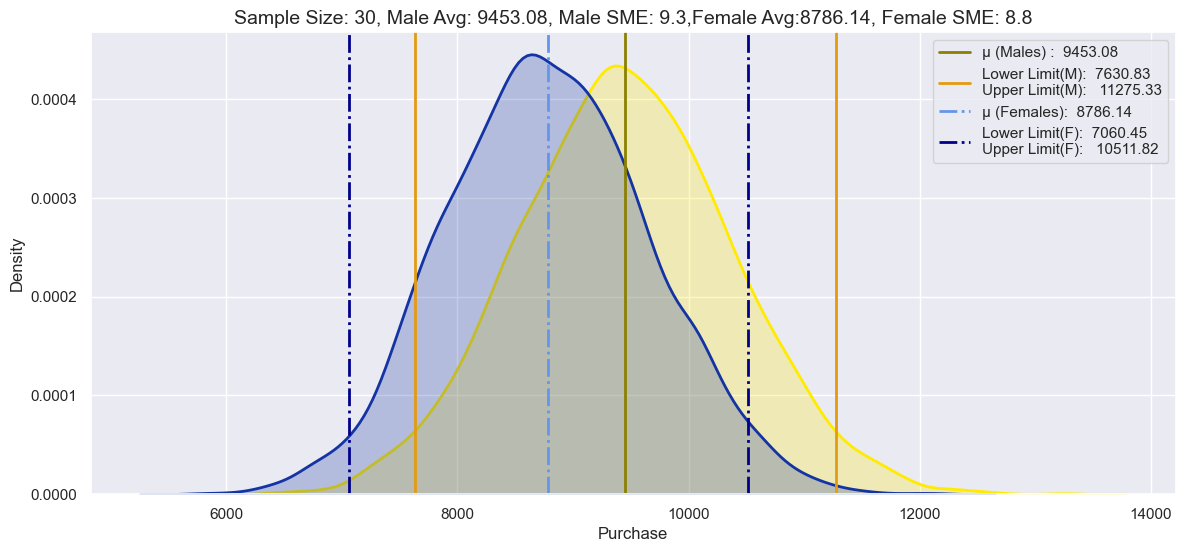

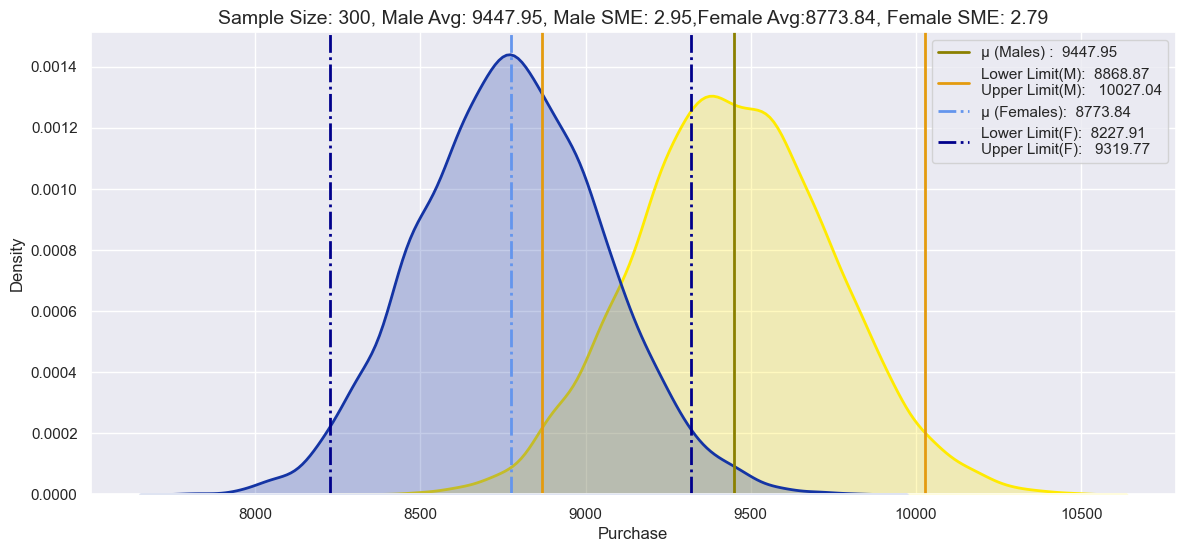

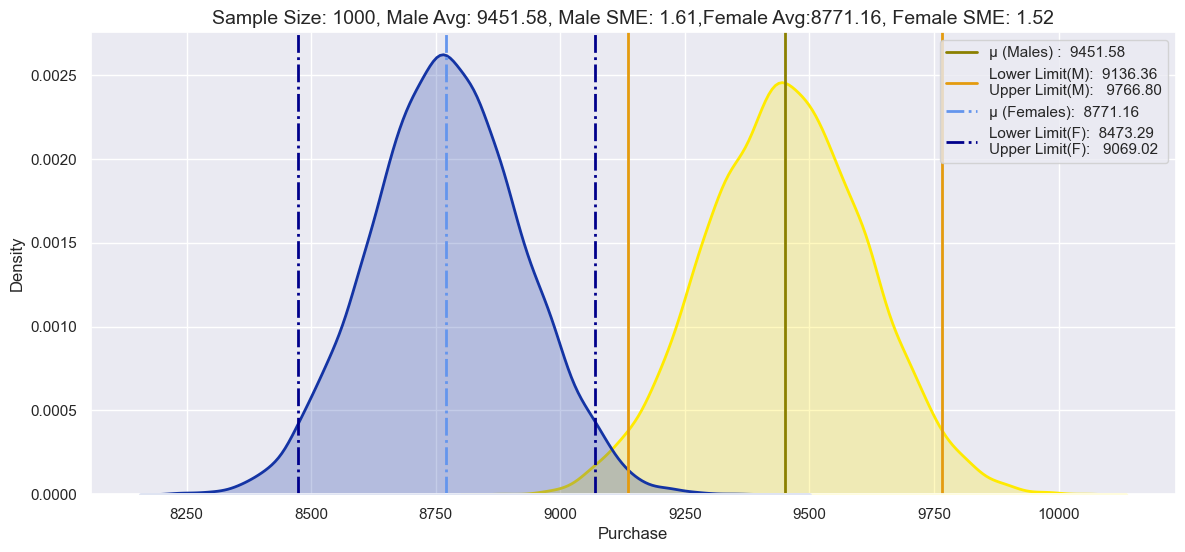

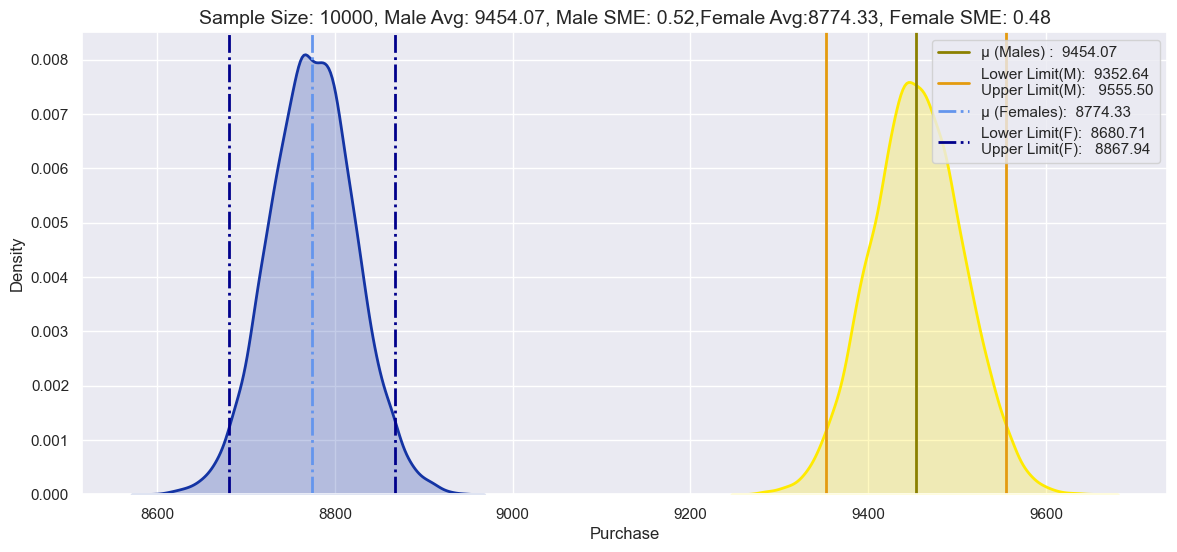

In [28]:
itr_size = 10000
size_list = [10, 30, 300, 1000, 10000]
ci = 0.95

# Define the structured data type
dtype = np.dtype([('Gender', 'U1'), ('Lower_limit', 'float'), ('Upper_limit', 'float'),
                  ('Sample_Size', 'int'), ('CI', 'O'), ('Range', 'float'), ('Confidence_pct', 'float')])

array = np.empty((0,), dtype=dtype)

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping(retail_data_smp_male, retail_data_smp_female, smp_siz, itr_size, ci)

    row_m = np.array([('M', ll_m, ul_m, smp_siz, [ll_m, ul_m], (ul_m - ll_m), 95)], dtype=dtype)
    row_f = np.array([('F', ll_f, ul_f, smp_siz, [ll_f, ul_f], (ul_f - ll_f), 95)], dtype=dtype)

    array = np.append(array, row_m)
    array = np.append(array, row_f)

overlap = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
print()

In [29]:
overlap.head(5)

,Gender,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
0,M,6278.56,12589.30,10,"[6278.56, 12589.3]",6310.74,95.0
1,F,5824.61,11723.76,10,"[5824.61, 11723.76]",5899.15,95.0
2,M,7630.83,11275.33,30,"[7630.83, 11275.33]",3644.50,95.0
3,F,7060.45,10511.82,30,"[7060.45, 10511.82]",3451.37,95.0
4,M,8868.87,10027.04,300,"[8868.87, 10027.04]",1158.17,95.0


In [30]:
overlap.loc[(overlap['Gender'] == 'M') & (overlap['Sample_Size'] >= 300)]

,Gender,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
4,M,8868.87,10027.04,300,"[8868.87, 10027.04]",1158.17,95.0
6,M,9136.36,9766.80,1000,"[9136.36, 9766.8]",630.44,95.0
8,M,9352.64,9555.50,10000,"[9352.64, 9555.5]",202.86,95.0


In [31]:
overlap.loc[(overlap['Gender'] == 'F') & (overlap['Sample_Size'] >= 300)]

,Gender,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
5,F,8227.91,9319.77,300,"[8227.91, 9319.77]",1091.86,95.0
7,F,8473.29,9069.02,1000,"[8473.29, 9069.02]",595.73,95.0
9,F,8680.71,8867.94,10000,"[8680.71, 8867.94]",187.23,95.0


### CLT Analysis - Marital Status Comparison

In [32]:
data['Marital_Status'].replace(to_replace = 0, value = 'Unmarried', inplace = True)
data['Marital_Status'].replace(to_replace = 1, value = 'Married', inplace = True)

In [33]:
retail_data_smp_married = data[data['Marital_Status'] == 'Married']['Purchase']
retail_data_smp_unmarried = data[data['Marital_Status'] == 'Unmarried']['Purchase']

In [34]:
data.sample(500,replace=True).groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Married,210.0,9923.852381,5416.268541,48.0,6183.25,8752.5,14116.5,23958.0
Unmarried,290.0,9041.741379,5231.024361,49.0,5346.75,7941.0,12001.0,23847.0


In [35]:
def bootstrapping_m_vs_um(sample1, sample2, smp_siz=500, itr_size=1000, confidence_level=0.95, no_of_tails=2):
    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        
        # Check if sample1 or sample2 is None
        if sample1 is None or sample2 is None:
            break
        else:
            smp1_n = np.random.choice(sample1, size=smp_siz, replace=True)
            smp2_n = np.random.choice(sample2, size=smp_siz, replace=True)
            
            # Check if both arrays are empty
            if smp1_n.size == 0 or smp2_n.size == 0:
                continue
            
            smp1_means_m[i] = np.mean(smp1_n)
            smp2_means_m[i] = np.mean(smp2_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = statistics.stdev(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)
    
    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)
    
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = statistics.stdev(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)

    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)
        
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp1_means_m,color="#FFEA00",fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,color='#1434A4',fill=True,linewidth=2)
    
    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))
    
    plt.title(f"Sample Size: {smp_siz}, Married Avg: {np.round(mean1, 2)}, Married SME: {np.round(sem1,2)},Unmarried Avg:{np.round(mean2, 2)}, Unmarried SME: {np.round(sem2,2)}",
              fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = '#8B8000', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = '#E49B0F', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = '#E49B0F', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = '#6495ED', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#00008B', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#00008B', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

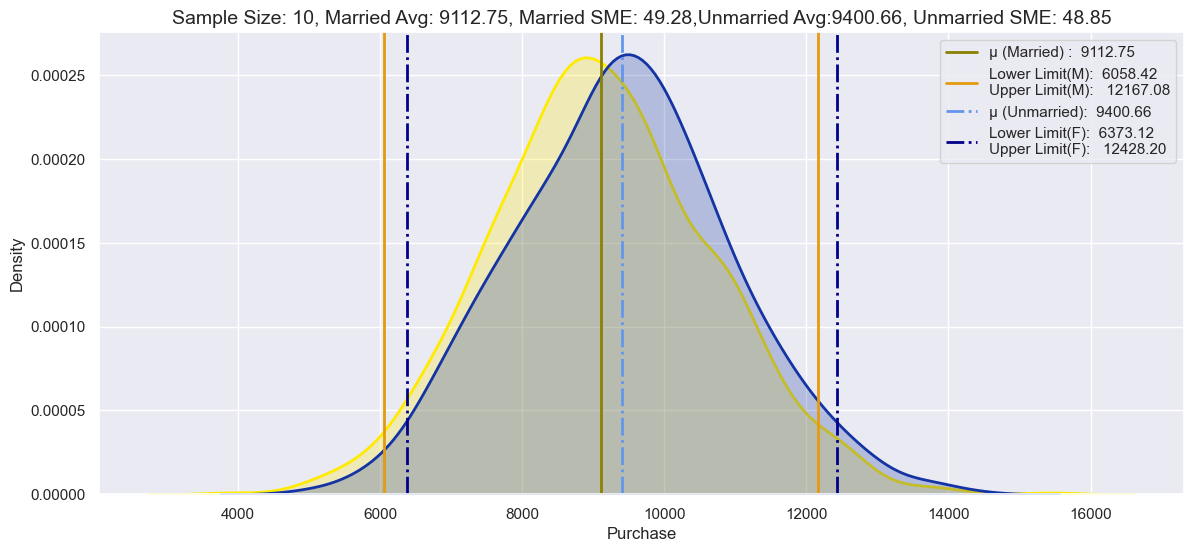

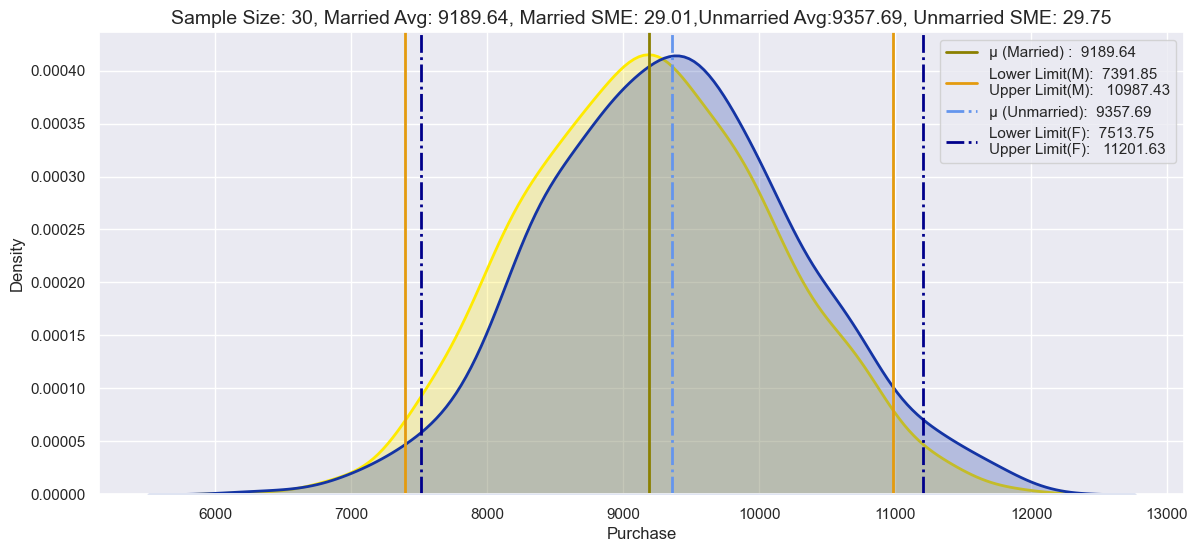

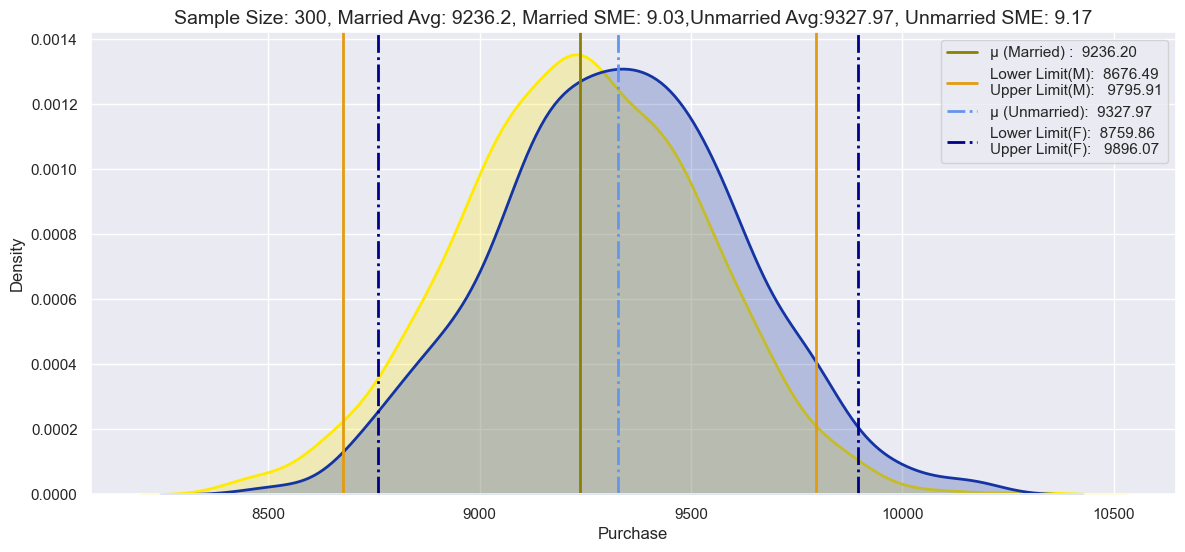

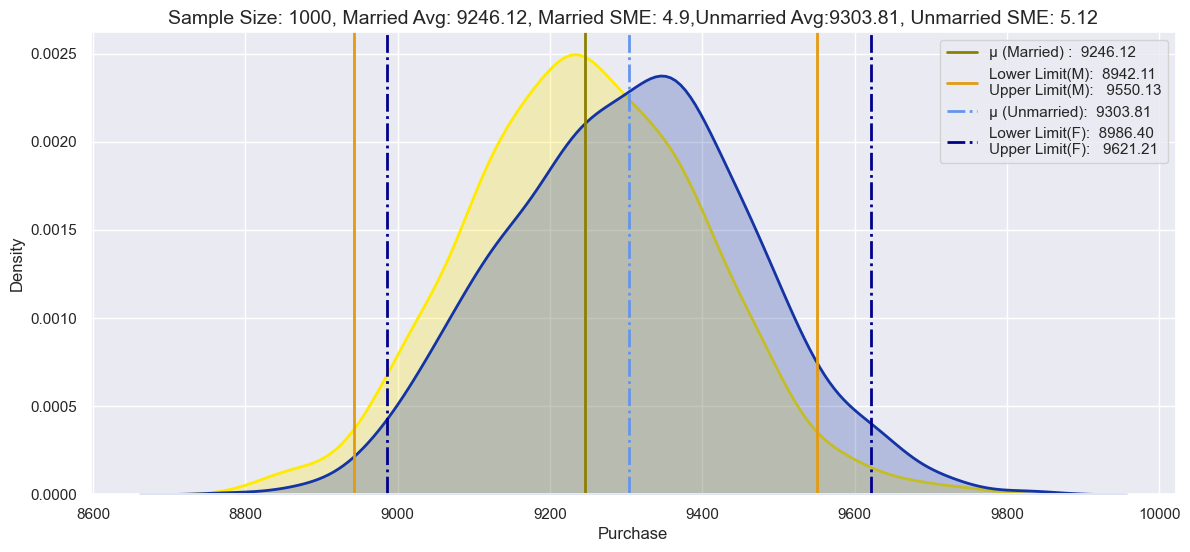

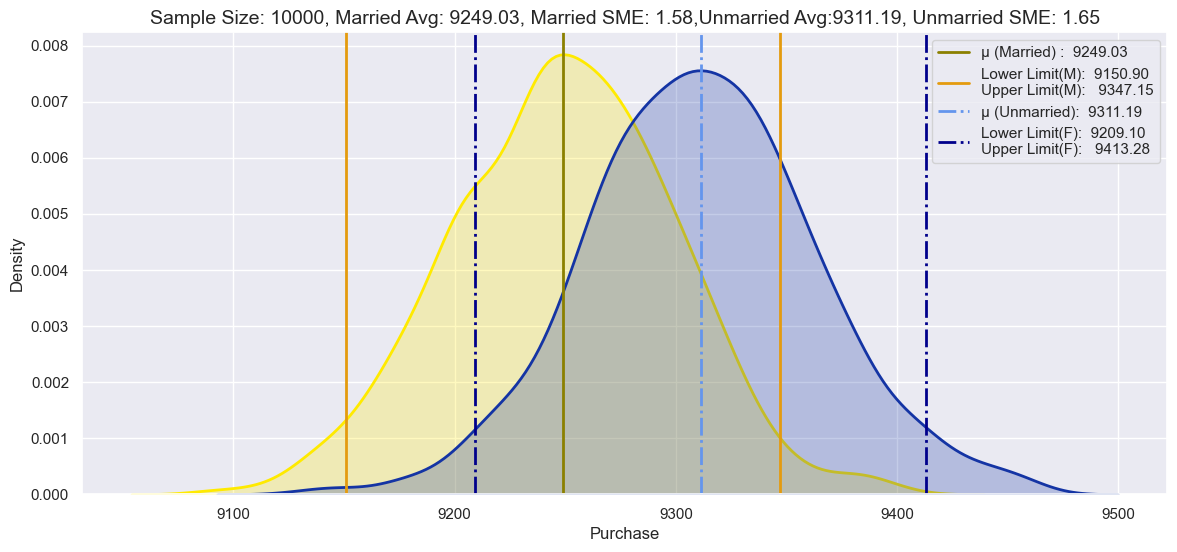

In [36]:
itr_size = 1000
size_list = [10, 30, 300, 1000, 10000]
ci = 0.95

array = np.empty((0, 8))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_u, ul_u = bootstrapping_m_vs_um(retail_data_smp_married, retail_data_smp_unmarried,
                                                                smp_siz, itr_size, ci)

    # Check if samples are empty
    if not m_avg.any() or not f_avg.any():
        continue  # Skip iteration if samples are empty

    # Append rows with separate elements for 'Lower_limit' and 'Upper_limit'
    array = np.append(array, np.array([['Married', ll_m, ul_m, smp_siz, ll_m, ul_m, (ul_m - ll_m), 95]]), axis=0)
    array = np.append(array, np.array([['Unmarried', ll_u, ul_u, smp_siz, ll_u, ul_u, (ul_u - ll_u), 95]]), axis=0)

# Convert the array to a DataFrame
overlap = pd.DataFrame(array, columns=['Marital_Status', 'Lower_limit', 'Upper_limit', 'Sample_Size', 'Lower_limit', 'Upper_limit', 'Range', 'Confidence_pct'])


In [37]:
overlap.head()

,Marital_Status,Lower_limit,Upper_limit,Sample_Size,Lower_limit,Upper_limit,Range,Confidence_pct
0,Married,6058.42,12167.08,10,6058.42,12167.08,6108.66,95
1,Unmarried,6373.12,12428.2,10,6373.12,12428.2,6055.080000000001,95
2,Married,7391.85,10987.43,30,7391.85,10987.43,3595.58,95
3,Unmarried,7513.75,11201.63,30,7513.75,11201.63,3687.879999999999,95
4,Married,8676.49,9795.91,300,8676.49,9795.91,1119.42,95


In [38]:
retail_data_smp_married = data[data['Marital_Status'] == 'Married']['Purchase']
retail_data_smp_unmarried = data[data['Marital_Status'] == 'Unmarried']['Purchase']

### CLT Analysis - Age Comparison

In [39]:
def bootstrapping_age(sample,smp_siz=500,itr_size=5000,confidence_level=0.99,no_of_tails=2):
    
    smp_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp_n = np.empty(smp_siz)
        smp_n = np.random.choice(sample, size = smp_siz,replace=True)
        smp_means_m[i] = np.mean(smp_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean  = np.mean(smp_means_m)
    sigma = statistics.stdev(smp_means_m)
    sem   = stats.sem(smp_means_m)
    
    lower_limit = mean - (z_critical * sigma)
    upper_limit = mean + (z_critical * sigma)
       
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp_means_m,color="#1434A4",fill=True,linewidth=2)
    
    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))
    
    plt.title(f"Sample Size: {smp_siz},Mean:{np.round(mean,2)}, SME:{np.round(sem,2)}",fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(mean, color = '#6495ED', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = '#00008B', linestyle = 'solid', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = '#00008B', linestyle = 'solid', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return smp_means_m ,np.round(lower_limit,2),np.round(upper_limit,2)

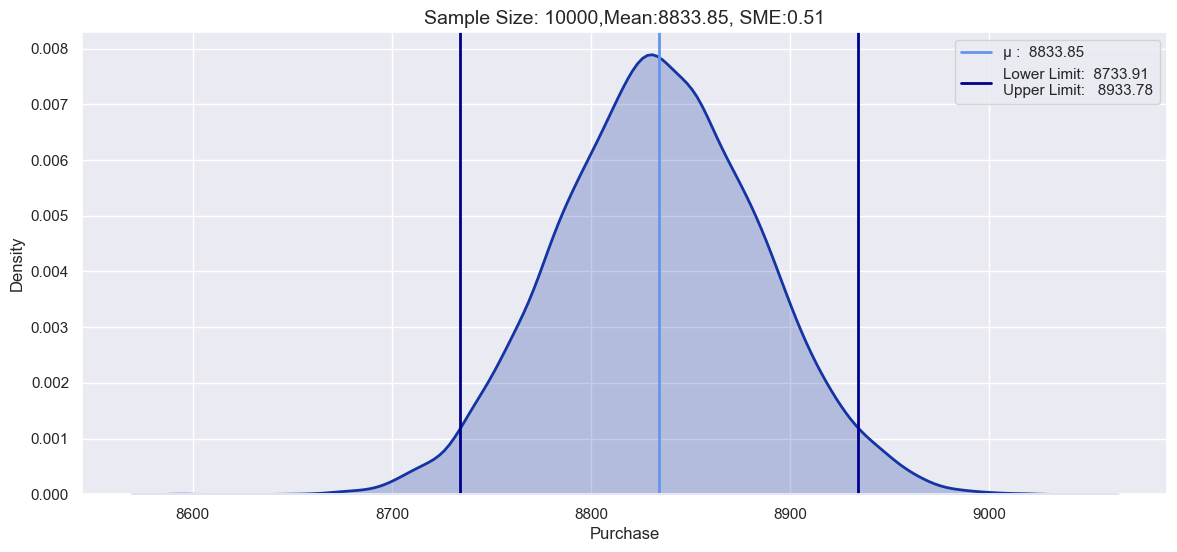

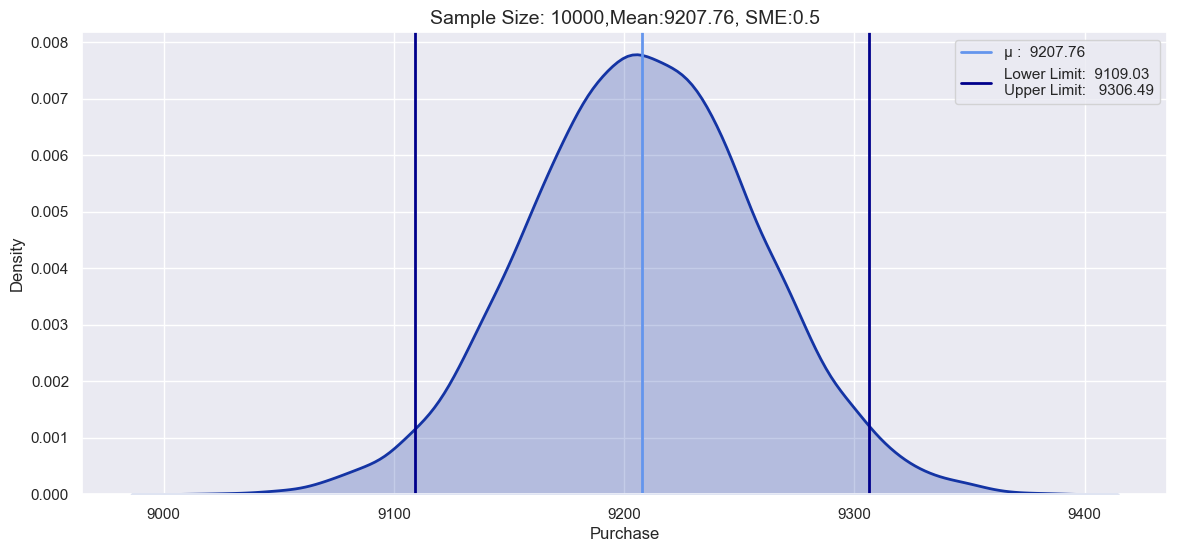

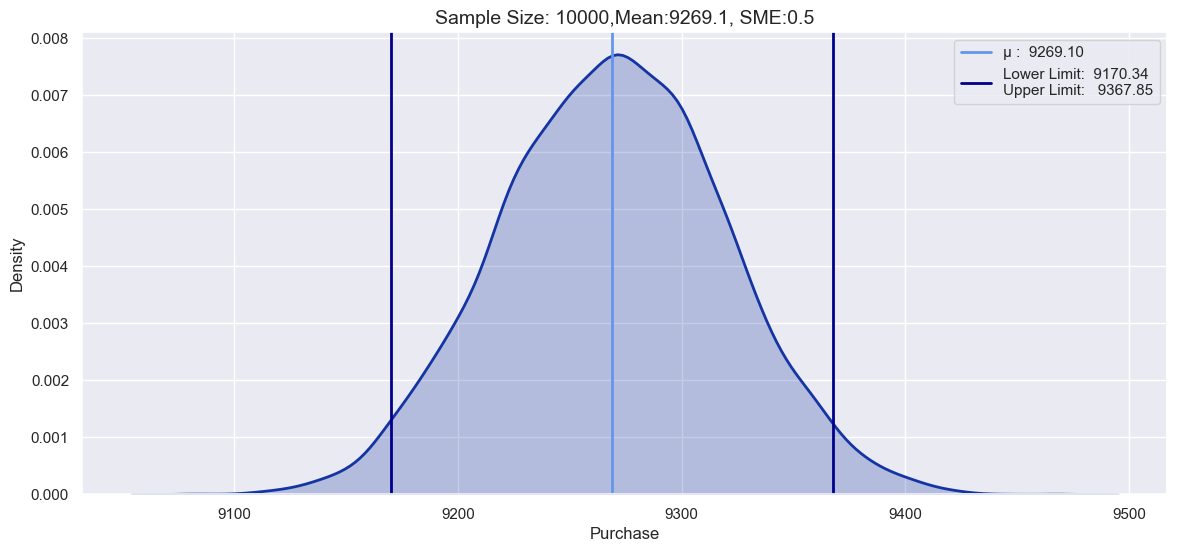

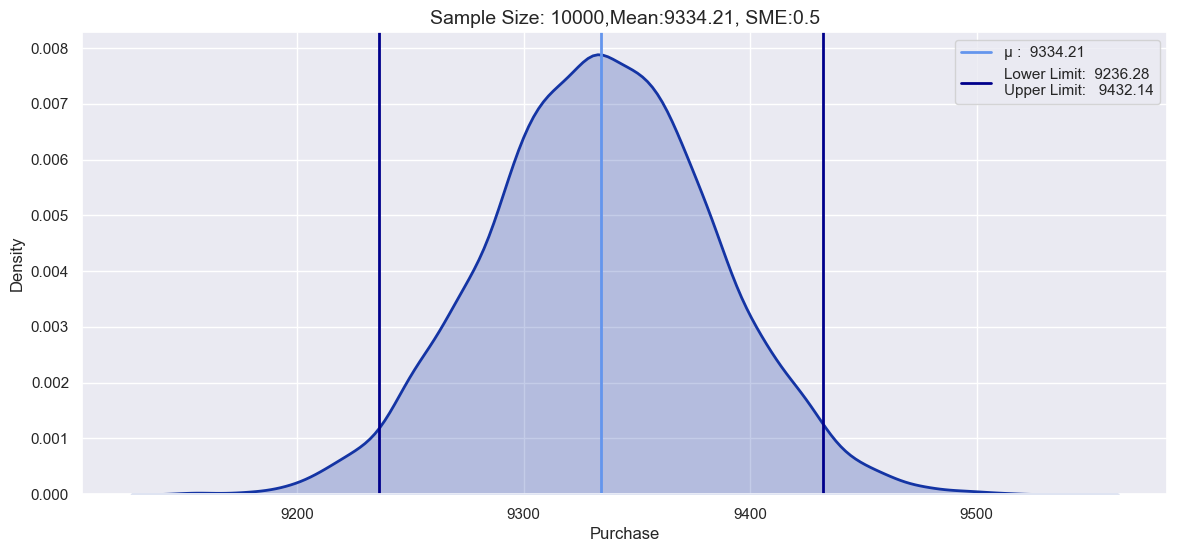

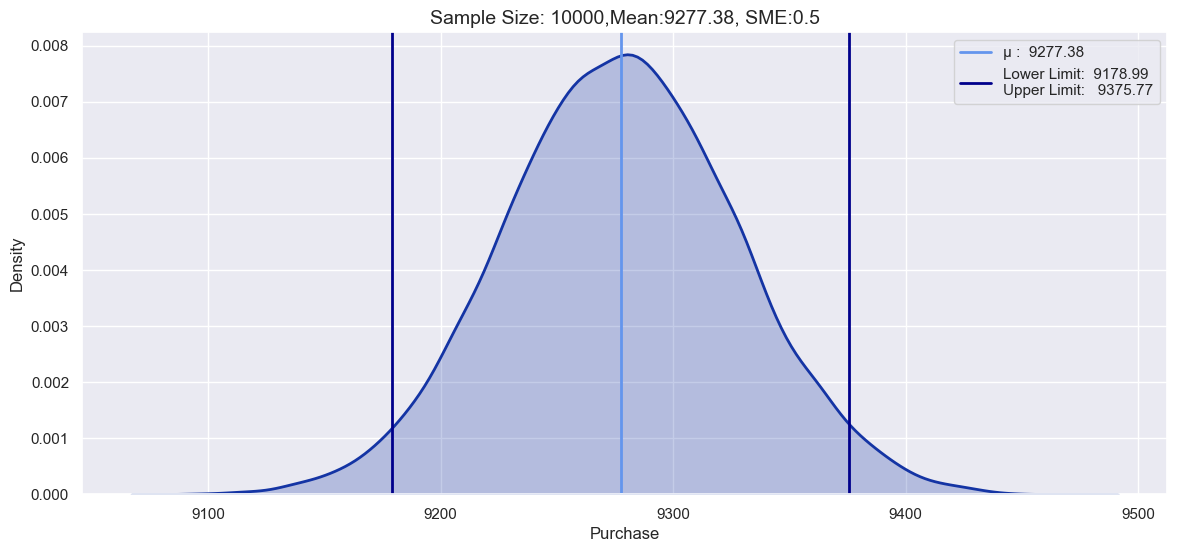

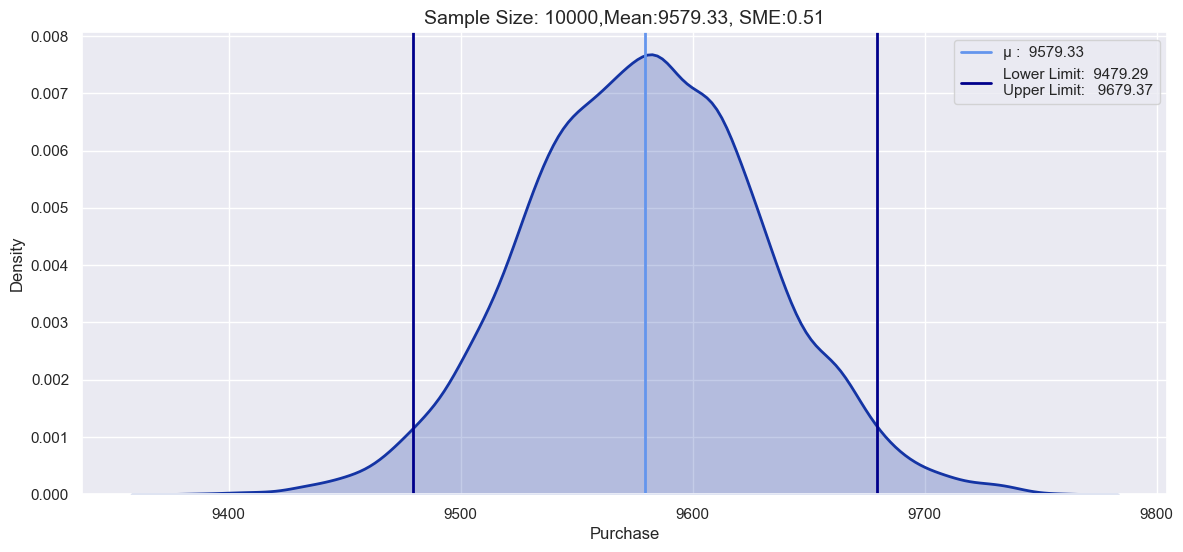

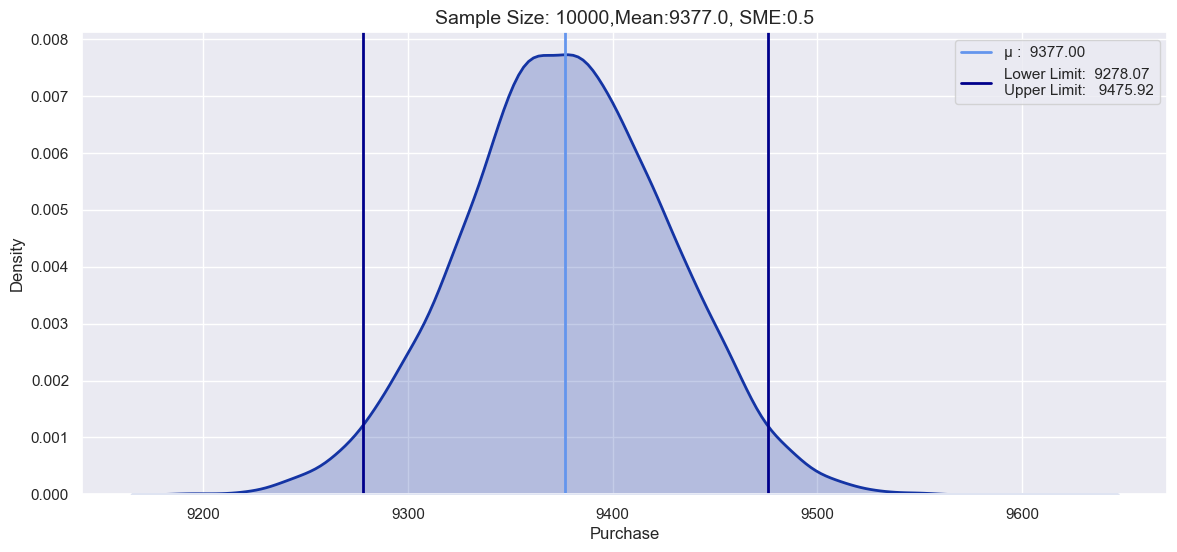

In [40]:
itr_size = 10000
smp_size = 10000
ci = 0.95
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

data_list = []

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(data[data['Age'] == age]['Purchase'], smp_size, itr_size, ci)

    # Create a dictionary for each row
    row_dict = {
        'Age_Group': age,
        'Mean': np.round(mean, 2),
        'Lower_limit': ll_m,
        'Upper_limit': ul_m,
        'Sample_Size': smp_size,
        'CI': [ll_m, ul_m],
        'Range': (ul_m - ll_m),
        'Confidence_pct': 95
    }

    # Append to the list
    data_list.append(row_dict)

age_data = pd.DataFrame(data_list)

In [41]:
age_data.head(5)

,Age_Group,Mean,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
0,0-17,"[8841.18, 8824.2, 8834.99, 8893.26, 8762.64, 8...",8733.91,8933.78,10000,"[8733.91, 8933.78]",199.87,95
1,18-25,"[9218.96, 9258.99, 9148.3, 9253.11, 9238.11, 9...",9109.03,9306.49,10000,"[9109.03, 9306.49]",197.46,95
2,26-35,"[9269.4, 9244.77, 9347.62, 9290.32, 9273.19, 9...",9170.34,9367.85,10000,"[9170.34, 9367.85]",197.51,95
3,36-45,"[9405.17, 9353.07, 9314.2, 9359.52, 9420.76, 9...",9236.28,9432.14,10000,"[9236.28, 9432.14]",195.86,95
4,46-50,"[9283.32, 9231.98, 9130.9, 9271.61, 9186.33, 9...",9178.99,9375.77,10000,"[9178.99, 9375.77]",196.78,95


Checking the Sampling distribution of a sample mean for each Age Group

In [42]:
age_dict = {}
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 
for i in range(len(age_data)):
    age_dict[age_list[i]] = age_data.loc[i, "Mean"]

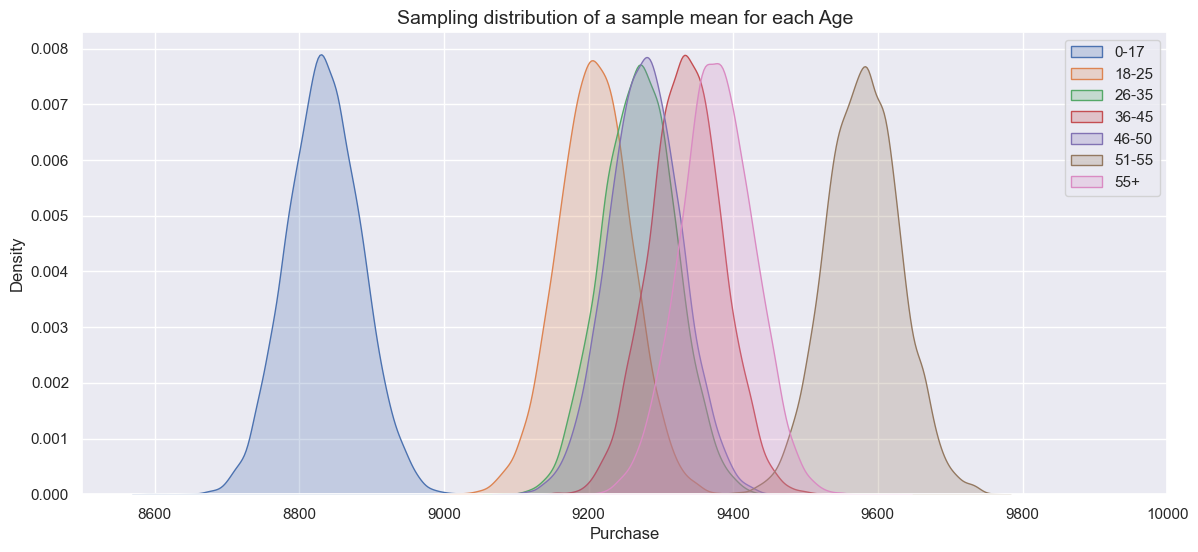

In [43]:
fig, ax = plt.subplots(figsize=(14,6))
sns.set_style("darkgrid")
for label_val in age_dict.keys():
    sns.kdeplot(age_dict[label_val], fill = True, label = label_val)

plt.title("Sampling distribution of a sample mean for each Age",fontsize=14)
plt.xlabel('Purchase')
plt.xlim(8500,10000)
plt.legend(loc='upper right')